In [18]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from shapely.geometry import Point

In [19]:
guatemala_data_path = Path().cwd().parent / "data/bank_location/guatemala.geojson"

guatemala_gdf = gpd.read_file(guatemala_data_path, crs="EPSG:4326")

In [20]:
guatemala_gdf.columns

Index(['NOMBRE__', 'COD_MUNI__', 'DEPTO__', 'COD_DEPT__', 'PERIMETR__',
       'AREA_KM__', 'geometry'],
      dtype='object')

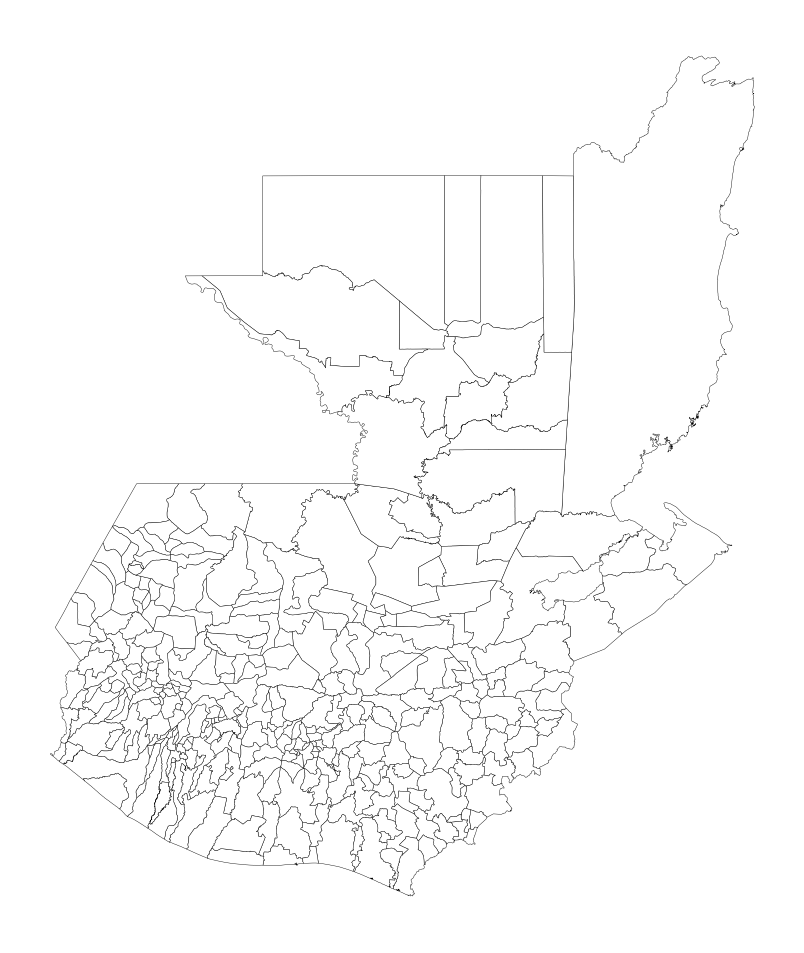

In [22]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax = guatemala_gdf.plot(ax=ax, color="white", edgecolor="black", linewidth=0.2)
ax.set_axis_off()
plt.show()

In [5]:
guatemala_gdf.NOMBRE__.unique()

array(['LAGO DE AMATITLÁN', 'Belice', 'Ixcán', 'Barillas',
       'Fray Bartolomé de Las Casas', 'San Mateo Ixtatán', 'Nentón',
       'Cobán', 'Puerto Barrios', 'Lívingston', 'Chahal',
       'San Sebastián Coatán', 'Santa Eulalia', 'Nebaj', 'Jacaltenango',
       'Santa Ana Huista', 'San Miguel Acatán', 'Chajul',
       'San Pedro Carchá', 'San Rafael La Independencia', 'Uspantán',
       'Cahabón', 'San Antonio Huista', 'Soloma', 'La Democracia',
       'El Estor', 'San Juan Ixcoy', 'Lanquín', 'Morales', 'Chiantla',
       'La Libertad', 'Cuilco', 'Chicamán', 'Los Amates', 'Senahú',
       'Panzós', 'Aguacatán', 'San Juan Atitán', 'Ixtahuacán',
       'San Sebastián Huehuetenango', 'San Cristóbal Verapaz',
       'San Juan Cotzal', 'Colotenango', 'San Juan Chamelco',
       'San Rafael Petzal', 'Tectitán', 'Cunén', 'Tacaná',
       'San Gaspar Ixchil', 'Santa Bárbara', 'Santa Cruz Verapaz',
       'Huehuetenango', 'Tucurú', 'Tamahú', 'Tactic',
       'Concepción Tutuapa', 'Cubulco',

In [23]:
"belice" in [municipio.lower() for municipio in guatemala_gdf.NOMBRE__.unique()]

True

In [25]:
guatemala_gdf = guatemala_gdf[guatemala_gdf["NOMBRE__"].str.lower() != "belice"]

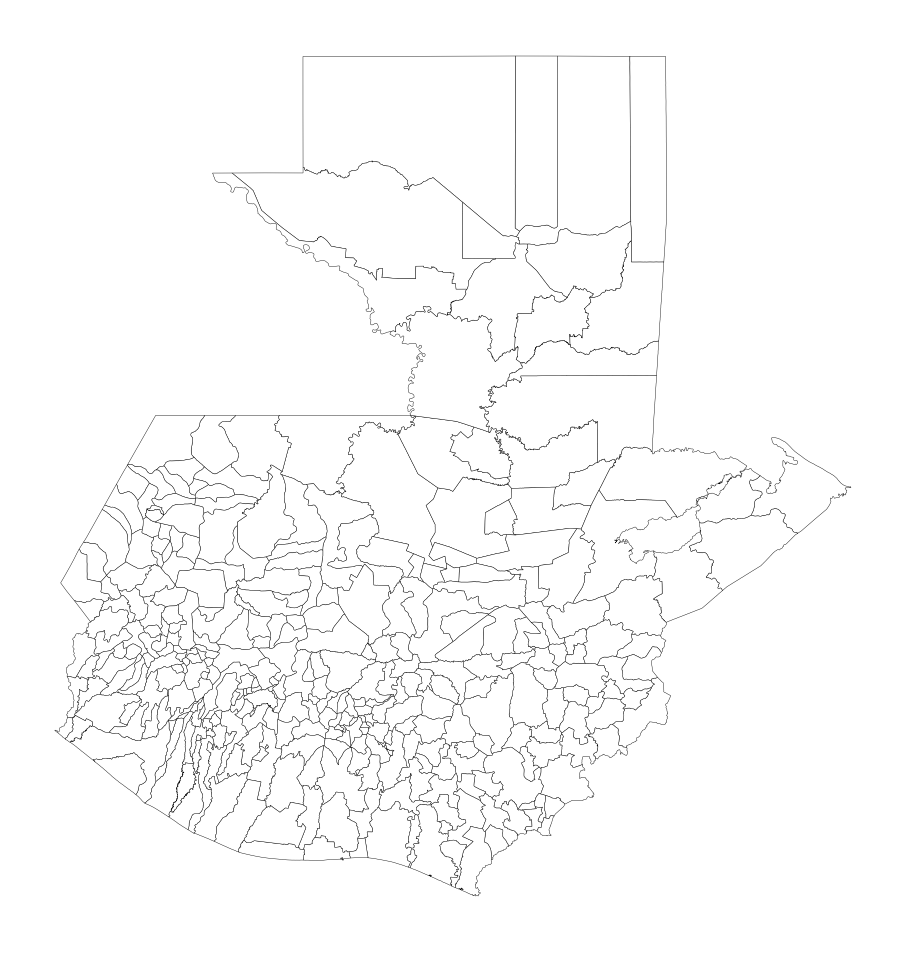

In [26]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax = guatemala_gdf.plot(ax=ax, color="white", edgecolor="black", linewidth=0.2)
ax.set_axis_off()
plt.show()

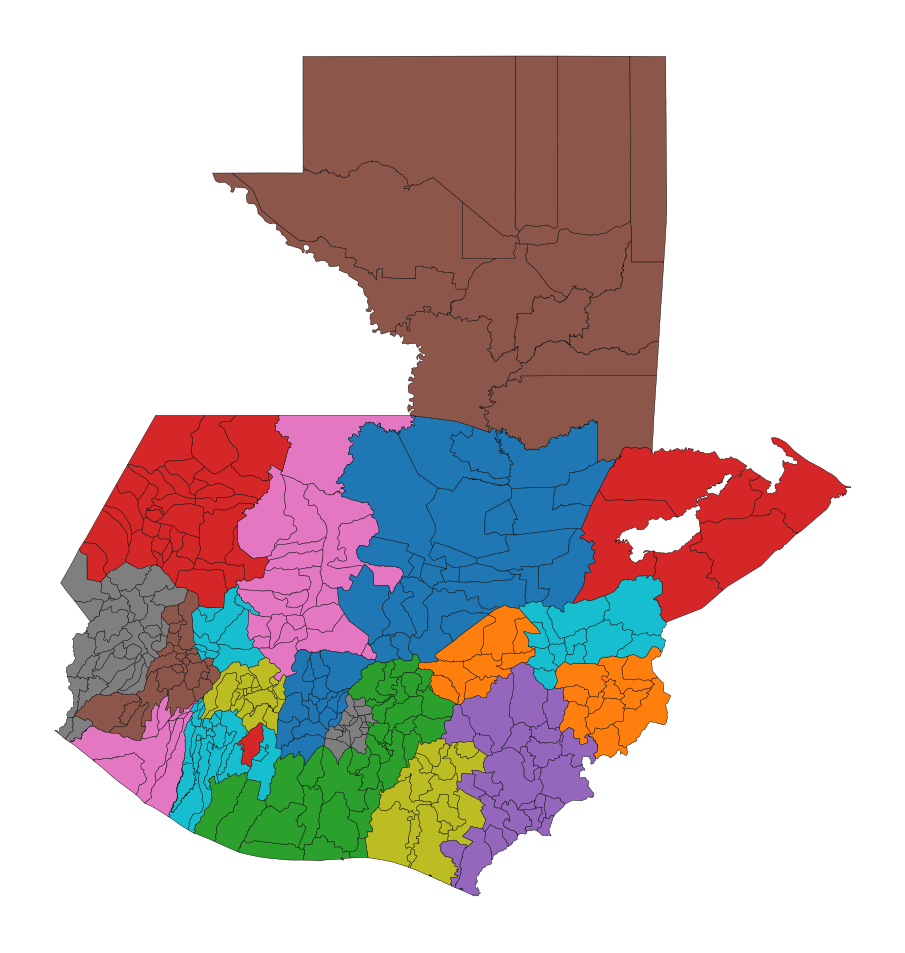

In [9]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax = guatemala_gdf.plot(column="DEPTO__", ax=ax, edgecolor="black", linewidth=0.2)
ax.set_axis_off()
plt.show()

In [27]:
bank_address_path = Path().cwd().parent / "data/bank_location/addresses.txt"

with open(bank_address_path, "r") as file:
    bank_addresses = file.readlines()

In [ ]:
with open(bank_address_path, "r") as file:

    bank_addresses = file.readlines()

In [29]:
bank_addresses

['Banco de Antigua, Calzada Raúl Aguilar Batres, Castañas - Villa Nueva, Zona 11 de Villa Nueva, Villa Nueva, Departamento de Guatemala, 01064, Guatemala\n',
 '12 Calle, Zona 10, Ciudad de Guatemala, Departamento de Guatemala, 01010, Guatemala\n',
 '5A Avenida 10-68, Zona 1, Ciudad de Guatemala, Departamento de Guatemala, Guatemala\n',
 'Centro Comercial, Carretera al Atlántico, Ciudad de Guatemala, Guatemala\n',
 'Centro Comercial Plaza Florida, Mixco, Guatemala\n',
 'Banco de Antigua, Alameda Santa Lucía, Panorama, Antigua Guatemala, Sacatepéquez, 03001, Guatemala\n',
 'Banco de Antigua, Carril Auxiliar Calzada Roosevelt, Colonia Landivar, Zona 7, Ciudad de Guatemala, Departamento de Guatemala, 01008, Guatemala\n',
 'Centro Comercial Atanasio Tzul, 51 Calle, Colonia El Tamarindo, Zona 12, Ciudad de Guatemala, Departamento de Guatemala, 01021, Guatemala\n',
 'Metrocentro Villa Nueva, 16 Avenida, La Arada, Zona 4 de Villa Nueva, Villa Nueva, Departamento de Guatemala, 01064, Guatemala\

In [11]:
geolocator = Nominatim(user_agent="test", timeout=3)

In [13]:
latitudes = []
longitudes = []

for address in bank_addresses:
    location = geolocator.geocode(address)
    if location is not None:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)

In [30]:
for log, lat in zip(longitudes, latitudes):
    print(f"{log} {lat}")

-90.5687338 14.5799008
-90.5023042 14.5986915
-90.5144519 14.6447674
-90.48186056894605 14.64728475
-90.58381203243167 14.649439950000001
-90.7378314243025 14.55506475
-90.5366605 14.6154788
-90.5768067 14.5139638
-90.9910991 14.7619202
-90.1990464 14.789983
-90.7847582 14.3023315
-91.861606 14.7042324
-90.5194142 14.5891183
-91.6714348 14.5368934
-91.47041041579341 15.321677399999999
-90.38540939768325 15.469927250000001
-89.8920229 16.9207534
-89.5318649 14.8077947
-90.7821972 15.9917572
-90.5119217 14.6524361
-90.5608923 14.5910877
-90.494656 14.5940297
-90.5221994407031 14.60161265


In [14]:
[Point(longitude, latitude) for longitude, latitude in zip(longitudes, latitudes)]

[<POINT (-90.569 14.58)>,
 <POINT (-90.502 14.599)>,
 <POINT (-90.514 14.645)>,
 <POINT (-90.482 14.647)>,
 <POINT (-90.584 14.649)>,
 <POINT (-90.738 14.555)>,
 <POINT (-90.537 14.615)>,
 <POINT (-90.577 14.514)>,
 <POINT (-90.991 14.762)>,
 <POINT (-90.199 14.79)>,
 <POINT (-90.785 14.302)>,
 <POINT (-91.862 14.704)>,
 <POINT (-90.519 14.589)>,
 <POINT (-91.671 14.537)>,
 <POINT (-91.47 15.322)>,
 <POINT (-90.385 15.47)>,
 <POINT (-89.892 16.921)>,
 <POINT (-89.532 14.808)>,
 <POINT (-90.782 15.992)>,
 <POINT (-90.512 14.652)>,
 <POINT (-90.561 14.591)>,
 <POINT (-90.495 14.594)>,
 <POINT (-90.522 14.602)>]

In [15]:
bank_location = gpd.GeoSeries(
    [Point(longitude, latitude) for longitude, latitude in zip(longitudes, latitudes)],
    crs=guatemala_gdf.crs,
)

In [16]:
bank_location

0     POINT (-90.56873 14.57990)
1     POINT (-90.50230 14.59869)
2     POINT (-90.51445 14.64477)
3     POINT (-90.48186 14.64728)
4     POINT (-90.58381 14.64944)
5     POINT (-90.73783 14.55506)
6     POINT (-90.53666 14.61548)
7     POINT (-90.57681 14.51396)
8     POINT (-90.99110 14.76192)
9     POINT (-90.19905 14.78998)
10    POINT (-90.78476 14.30233)
11    POINT (-91.86161 14.70423)
12    POINT (-90.51941 14.58912)
13    POINT (-91.67143 14.53689)
14    POINT (-91.47041 15.32168)
15    POINT (-90.38541 15.46993)
16    POINT (-89.89202 16.92075)
17    POINT (-89.53186 14.80779)
18    POINT (-90.78220 15.99176)
19    POINT (-90.51192 14.65244)
20    POINT (-90.56089 14.59109)
21    POINT (-90.49466 14.59403)
22    POINT (-90.52220 14.60161)
dtype: geometry

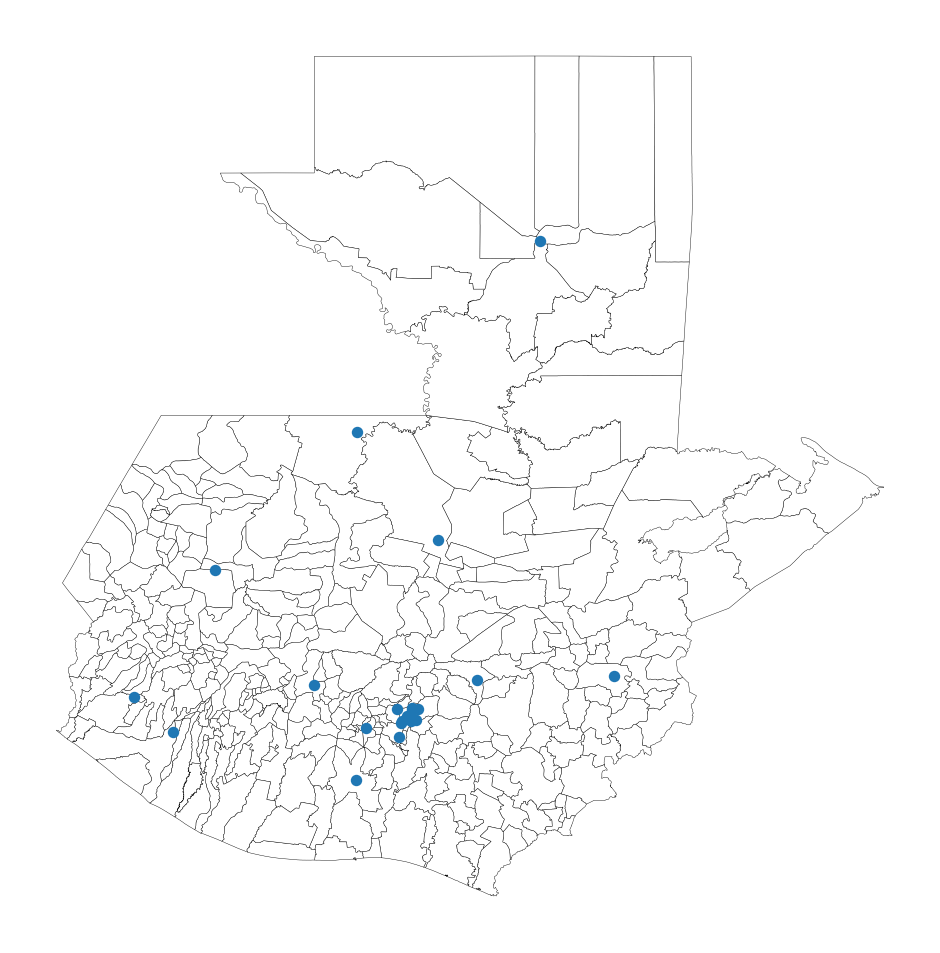

In [31]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax = guatemala_gdf.plot(ax=ax, color="white", edgecolor="black", linewidth=0.2)
bank_location.plot(ax=ax, aspect="equal", markersize=20)
ax.set_axis_off()
plt.show()